In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error

In [82]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [83]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [84]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [85]:
x = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)

In [89]:
print(y_pred)

[54.71185392 22.61551294 47.90314471 ... 16.79341955 63.34327368
 45.94262301]


In [90]:
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9889832909573145
Root Mean Squared Error: 2.0205515085050054
Mean Squared Error: 4.082628398521853


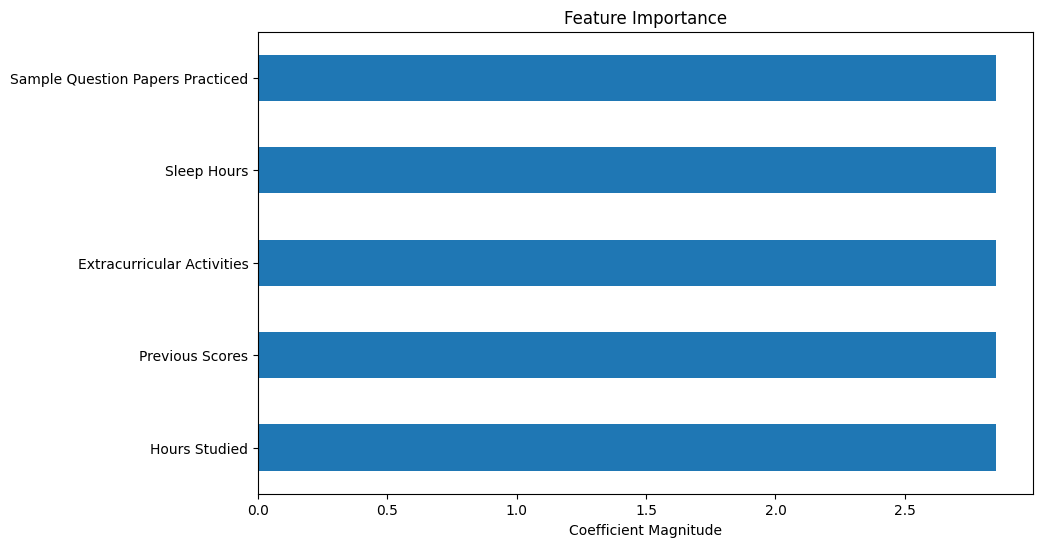

In [91]:
coeff = pd.Series(model.coef_[0], index=x.columns)
coeff.abs().sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.xlabel("Coefficient Magnitude")
plt.show()

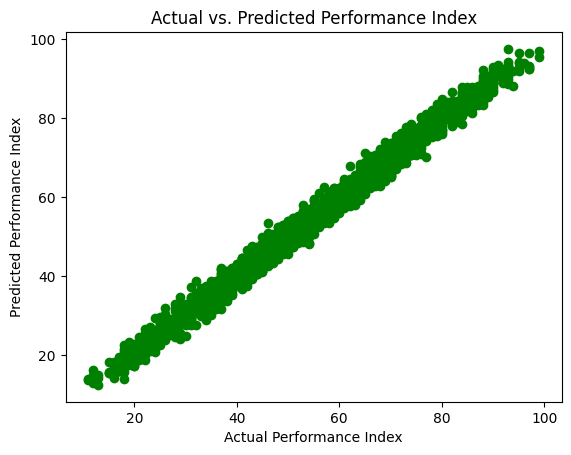

In [92]:
plt.scatter(y_test, y_pred, color = 'green')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.show()

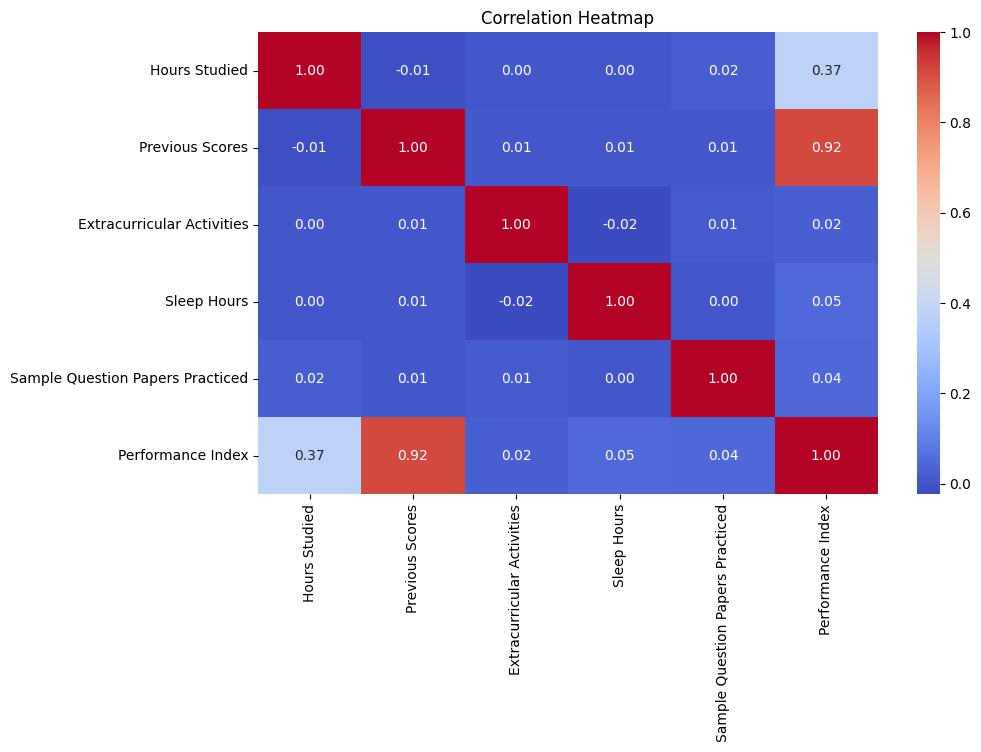

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [95]:
new_student = {
    "Hours Studied": 3,
    "Previous Scores": 60,
    "Extracurricular Activities": 1,
    "Sleep Hours": 6,
    "Sample Question Papers Practiced": 4
}
new_df = pd.DataFrame([new_student])
prediction = model.predict(new_df)
print(f"Predicted Performance Index: {prediction[0]}")

Predicted Performance Index: 39.89238886107349
